In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to calculate the magnetic field at a given position
def magnetic_field(x, y, z):
    # Calculate the cylindrical coordinates
    rho = np.sqrt(x*2 + y*2)
    phi = np.arctan2(y, x)

    # Calculate the magnetic field components
    B_rho = -2 * B0 * a * R / (rho*2 + (R - a * np.cos(phi))*2)*(3/2)
    B_phi = -B0 * a * np.sin(phi) / (rho + R - a * np.cos(phi))
    B_x = k*phi

    # Convert back to Cartesian coordinates
    Bz = B_rho * np.cos(phi) - B_phi * np.sin(phi)
    By = B_rho * np.sin(phi) + B_phi * np.cos(phi)
    Bx = B_x  # Assume zero magnetic field in the z-direction for simplicity

    return Bx, By, Bz

# Function to calculate the Lorentz force
def lorentz_force(q, v, B):
    # Calculate the force components
    Fx = q * (v[1] * B[2] - v[2] * B[1])
    Fy = q * (v[2] * B[0] - v[0] * B[2])
    Fz = q * (v[0] * B[1] - v[1] * B[0])

    return Fx, Fy, Fz

In [3]:
# Constants
B0 = 1.5  # Magnetic field strength
R = 0.5   # Major radius of the torus
a = 0.2   # Minor radius of the torus
k = 10

In [4]:
# Particle parameters
q = 1 #1.6e-19  # Charge of the particle
m = 2 #1.8*1.67e-27  # Mass of the particle
v0 = 10  # Initial velocity of the particle

w_L = (q*B0)/m
r_L = v0/w_L

t_start = 0.0  # Start time
t_end = 16  # End time
dt = 1e-4  # Time step

# Initial conditions
x0 = R + a +r_L  # Initial x-coordinate
y0 = 0    # Initial y-coordinate
z0 = 0    # Initial z-coordinate
vx0 = 0   # Initial x-velocity
vy0 = v0    # Initial y-velocity
vz0 = 0   # Initial z-velocity

# Arrays to store the particle trajectory
t = np.arange(t_start, t_end, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
z = np.zeros_like(t)
bx = np.zeros_like(t)
by = np.zeros_like(t)
bz = np.zeros_like(t)

# Perform the numerical integration
for i in range(len(t)):
    # Calculate the magnetic field at the current position
    B = magnetic_field(x[i], y[i], z[i])
    bx[i] = B[0]
    by[i] = B[1]
    bz[i] = B[2]
    
    # Calculate the Lorentz force
    F = lorentz_force(q, [vx0, vy0, vz0], B)

    # Update the velocities using the Euler method
    vx = vx0 + F[0] / m * dt
    vy = vy0 + F[1] / m * dt
    vz = vz0 + F[2] / m * dt

    # Update the positions using the Euler method
    x[i] = x0 + vx0 * dt
    y[i] = y0 + vy0 * dt
    z[i] = z0 + vz0 * dt

    # Update the initial conditions for the next iteration
    x0 = x[i]
    y0 = y[i]
    z0 = z[i]
    vx0 = vx
    vy0 = vy
    vz0 = vz

<IPython.core.display.Javascript object>


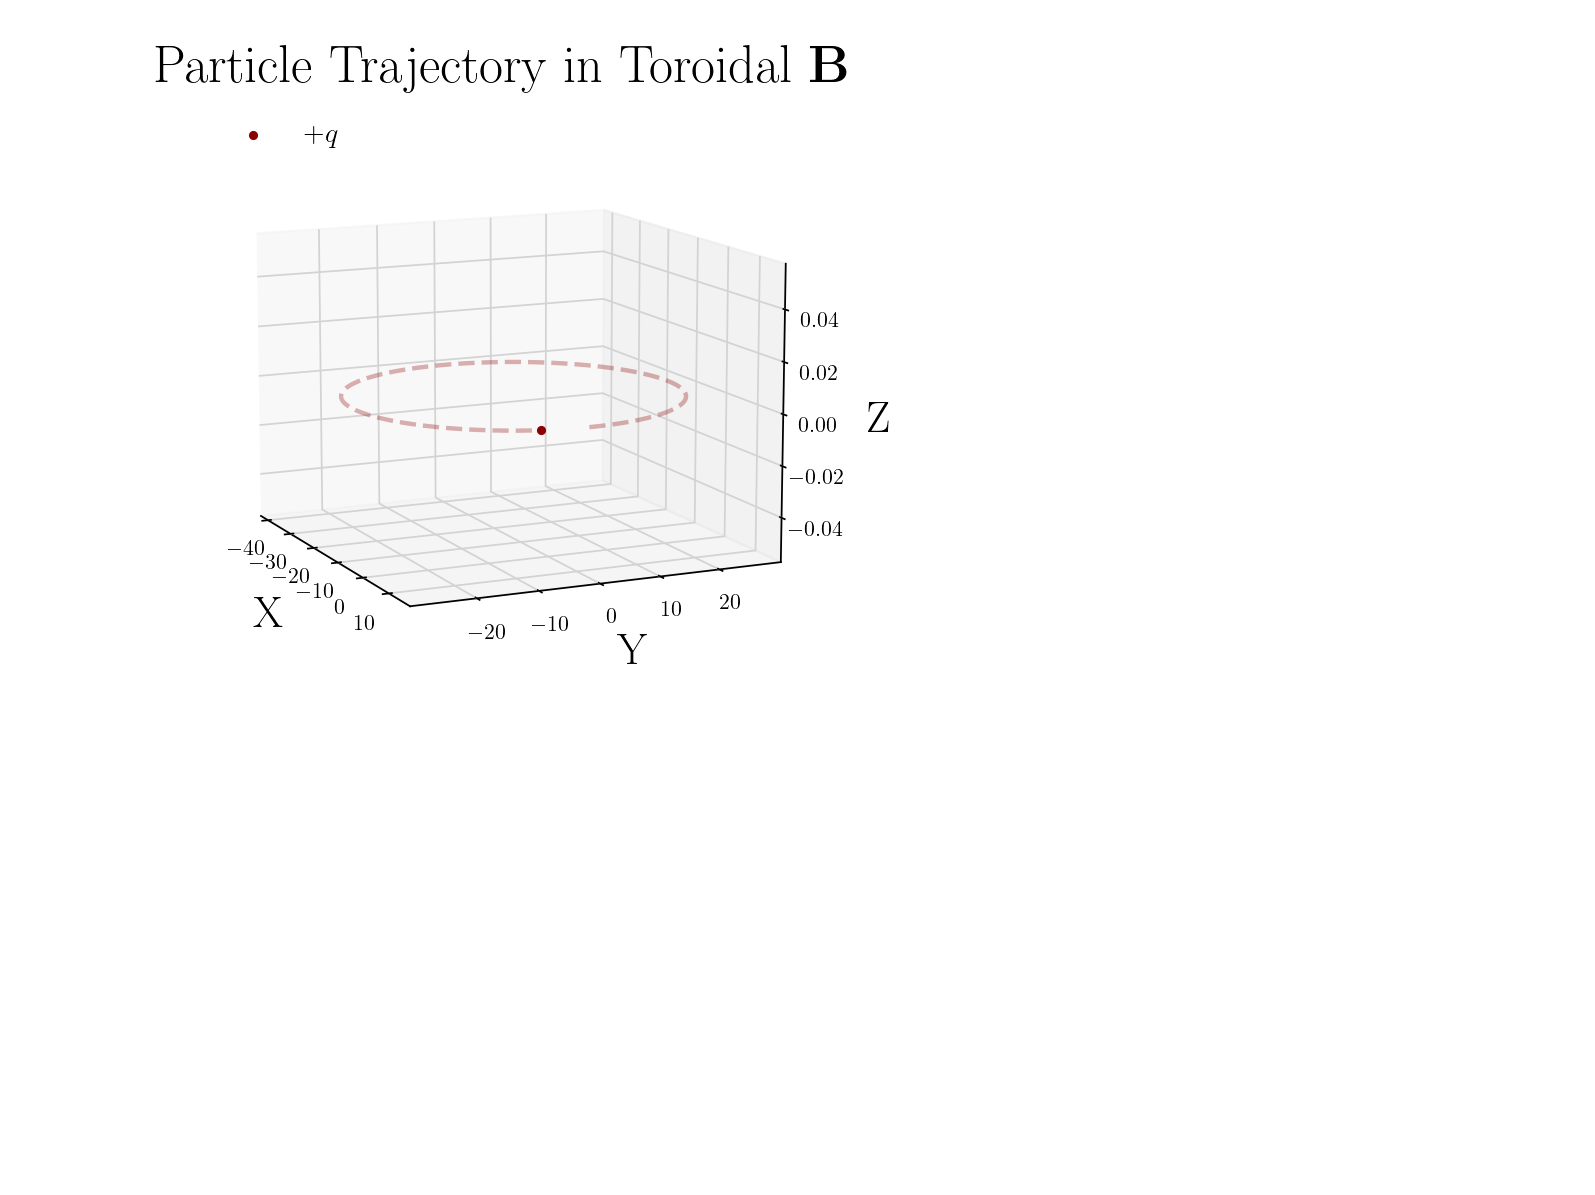

In [5]:
# Plot the particle trajectory
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z,color="darkred"
        ,alpha=0.3,linestyle="--",linewidth=2)

ax.scatter(x[-1], y[-1], z[-1],label=r"+$q$", color='darkred', s=10)
#ax.plot(x, y, z, color = 'dodgerblue', label=r'$\textbf{B}$', linewidth=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.xaxis.set_tick_params(labelsize=10,pad=1)
ax.yaxis.set_tick_params(labelsize=10,pad=1)
ax.zaxis.set_tick_params(labelsize=10,pad=1)
#ax.set_zlim(-0.1,0)

ax.set_title(r'Particle Trajectory in Toroidal \textbf{B}')

plt.legend(loc="upper left",prop={'size':13},frameon=False)
plt.show()

In [10]:
plt.savefig(f"Charged_Particle_Helic.png",png=600)

/tmp/ipykernel_5028/2604769835.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "png" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"Charged_Particle_Torus.png",png=600)
